<a href="https://colab.research.google.com/github/Bulkiskanata/Bulkiskanata/blob/main/program_13_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

# Upload file Esc50_features_extracted.csv
uploaded = files.upload()

Saving Esc50_features_extracted.csv to Esc50_features_extracted.csv


In [7]:
import pandas as pd

# Memuat dataset setelah upload
metadata = pd.read_csv('Esc50_features_extracted.csv')  # Pastikan nama file sesuai
print(metadata.head())  # Menampilkan beberapa baris pertama dari dataset

   Unnamed: 0           filename  fold  target        category  esc10  \
0           0   1-100032-A-0.wav     1       0             dog   True   
1           1  1-100038-A-14.wav     1      14  chirping_birds  False   
2           2  1-100210-A-36.wav     1      36  vacuum_cleaner  False   
3           3  1-100210-B-36.wav     1      36  vacuum_cleaner  False   
4           4  1-101296-A-19.wav     1      19    thunderstorm  False   

   src_file take                                         files_path  \
0    100032    A  /kaggle/input/environmental-sound-classificati...   
1    100038    A  /kaggle/input/environmental-sound-classificati...   
2    100210    A  /kaggle/input/environmental-sound-classificati...   
3    100210    B  /kaggle/input/environmental-sound-classificati...   
4    101296    A  /kaggle/input/environmental-sound-classificati...   

   zero_crossing_rate  ...    mfcc_10    mfcc_11    mfcc_12    mfcc_13  \
0            0.011952  ...  -0.676718  -0.050617  -1.051819 

In [8]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
csv_path = '/content/drive/My Drive/Esc50_features_extracted.csv'  # Ganti dengan path yang tepat
metadata = pd.read_csv(csv_path)
print(metadata.head())  # Menampilkan beberapa baris pertama dari dataset

   Unnamed: 0           filename  fold  target        category  esc10  \
0           0   1-100032-A-0.wav     1       0             dog   True   
1           1  1-100038-A-14.wav     1      14  chirping_birds  False   
2           2  1-100210-A-36.wav     1      36  vacuum_cleaner  False   
3           3  1-100210-B-36.wav     1      36  vacuum_cleaner  False   
4           4  1-101296-A-19.wav     1      19    thunderstorm  False   

   src_file take                                         files_path  \
0    100032    A  /kaggle/input/environmental-sound-classificati...   
1    100038    A  /kaggle/input/environmental-sound-classificati...   
2    100210    A  /kaggle/input/environmental-sound-classificati...   
3    100210    B  /kaggle/input/environmental-sound-classificati...   
4    101296    A  /kaggle/input/environmental-sound-classificati...   

   zero_crossing_rate  ...    mfcc_10    mfcc_11    mfcc_12    mfcc_13  \
0            0.011952  ...  -0.676718  -0.050617  -1.051819 

In [11]:
# Memeriksa beberapa baris pertama dari dataset
print(metadata.head())

# Memeriksa informasi dataset
print(metadata.info())  # Menampilkan info tentang kolom dan tipe datanya

   Unnamed: 0           filename  fold  target        category  esc10  \
0           0   1-100032-A-0.wav     1       0             dog   True   
1           1  1-100038-A-14.wav     1      14  chirping_birds  False   
2           2  1-100210-A-36.wav     1      36  vacuum_cleaner  False   
3           3  1-100210-B-36.wav     1      36  vacuum_cleaner  False   
4           4  1-101296-A-19.wav     1      19    thunderstorm  False   

   src_file take                                         files_path  \
0    100032    A  /kaggle/input/environmental-sound-classificati...   
1    100038    A  /kaggle/input/environmental-sound-classificati...   
2    100210    A  /kaggle/input/environmental-sound-classificati...   
3    100210    B  /kaggle/input/environmental-sound-classificati...   
4    101296    A  /kaggle/input/environmental-sound-classificati...   

   zero_crossing_rate  ...    mfcc_10    mfcc_11    mfcc_12    mfcc_13  \
0            0.011952  ...  -0.676718  -0.050617  -1.051819 

In [12]:
# Menampilkan nama-nama kolom dalam dataset
print(metadata.columns)

Index(['Unnamed: 0', 'filename', 'fold', 'target', 'category', 'esc10',
       'src_file', 'take', 'files_path', 'zero_crossing_rate', 'chroma_stft',
       'rmse', 'spectral_centroid', 'spectral_bandwidth', 'beat_per_minute',
       'rolloff', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19'],
      dtype='object')


In [16]:
# Import necessary libraries
import pandas as pd  # For handling data in DataFrames
import numpy as np  # For numerical operations
import librosa  # For audio processing
import matplotlib.pyplot as plt  # For visualization
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense  # For model layers

In [17]:
# Load the dataset that you've uploaded in Google Colab
metadata = pd.read_csv('Esc50_features_extracted.csv')  # Ensure the filename matches what you uploaded
print(metadata.head())  # Display the first few rows of the dataset

   Unnamed: 0           filename  fold  target        category  esc10  \
0           0   1-100032-A-0.wav     1       0             dog   True   
1           1  1-100038-A-14.wav     1      14  chirping_birds  False   
2           2  1-100210-A-36.wav     1      36  vacuum_cleaner  False   
3           3  1-100210-B-36.wav     1      36  vacuum_cleaner  False   
4           4  1-101296-A-19.wav     1      19    thunderstorm  False   

   src_file take                                         files_path  \
0    100032    A  /kaggle/input/environmental-sound-classificati...   
1    100038    A  /kaggle/input/environmental-sound-classificati...   
2    100210    A  /kaggle/input/environmental-sound-classificati...   
3    100210    B  /kaggle/input/environmental-sound-classificati...   
4    101296    A  /kaggle/input/environmental-sound-classificati...   

   zero_crossing_rate  ...    mfcc_10    mfcc_11    mfcc_12    mfcc_13  \
0            0.011952  ...  -0.676718  -0.050617  -1.051819 

In [18]:
# Extracting features and labels
feature_columns = [f'mfcc_{i}' for i in range(20)]  # Assume 20 MFCC features exist
X = metadata[feature_columns].values  # Get the MFCC features in a numpy array
y = metadata['category'].values  # Get the audio categories as numpy array

In [19]:
# Convert categorical labels to numerical values
le = LabelEncoder()  # Create a LabelEncoder instance
y_encoded = le.fit_transform(y)  # Fit and transform the category labels

In [20]:
# Reshaping data for Conv1D
X = X.reshape(len(X), 20, 1)  # Assuming 20 MFCC features, reshape to (samples, features, channels)

In [21]:
# Build the CNN model using Conv1D
model = Sequential()  # Create a Sequential model
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(20, 1)))  # Input shape for Conv1D
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Flatten())  # Flatten the output for the dense layer
model.add(Dense(64, activation='relu'))  # Dense layer with 64 units
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0315 - loss: 14.1138 - val_accuracy: 0.0500 - val_loss: 4.2324
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0795 - loss: 3.7455 - val_accuracy: 0.1200 - val_loss: 3.5440
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1901 - loss: 3.1721 - val_accuracy: 0.1775 - val_loss: 3.2444
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2409 - loss: 2.8873 - val_accuracy: 0.1650 - val_loss: 3.0695
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2768 - loss: 2.6758 - val_accuracy: 0.2275 - val_loss: 2.9045
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2896 - loss: 2.5606 - val_accuracy: 0.2300 - val_loss: 2.8655
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3338 - loss: 2.3749 - val_accuracy: 0.2575 - val_loss: 2.8406
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3213 - loss: 2.3241 - val_accuracy: 0.2725 - val_loss

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2898 - loss: 2.7488 
Loss: 2.6881418228149414, Accuracy: 0.2824999988079071


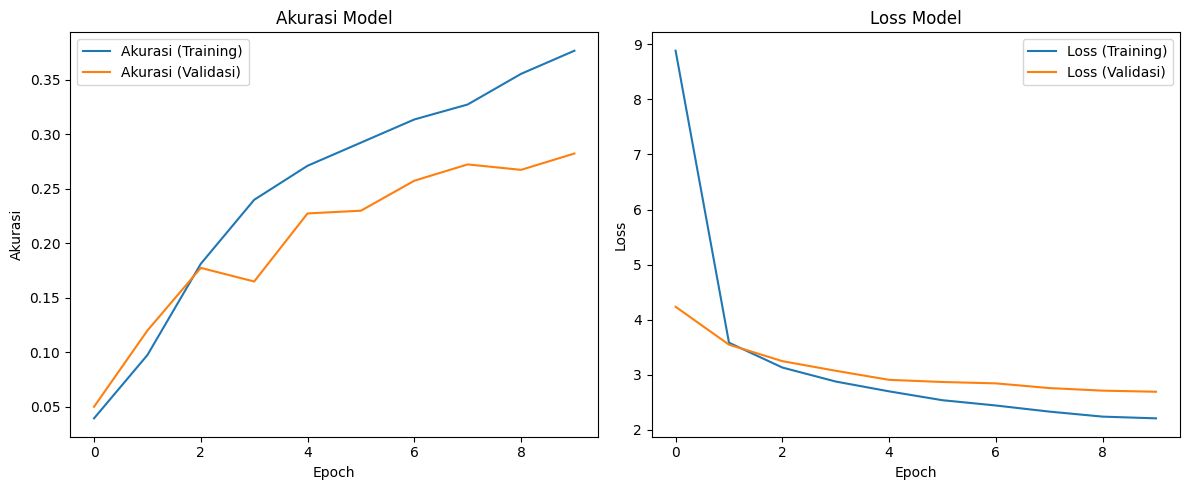

In [24]:
# Visualizing accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi (Training)')
plt.plot(history.history['val_accuracy'], label='Akurasi (Validasi)')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validasi)')
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()